## Exploratory Data Analysis (EDA)

Example of exploratory data analysis on the Titanic datast.
Demo inspired on https://www.kaggle.com/code/kanncaa1/dataiteam-titanic-eda

**Steps**
* Variable Description
* Univariate Variable Analysis: Categorical and Numerical Variables
* Basic Data Analysis
* Outlier Detection
* Missing Value - find and fill
* Visualization
* Feature engineering
* Modeling

In [252]:
# Import required libraries

# linear algebra and data processing libraries
import numpy as np
import pandas as pd

# scikit-learn libraries
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# Graphics Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Utils
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

### Load and Check Data

**Variable Description**
* PassengerId: unique id number to each passenger
* Survived: passenger survive(1) or died(0)
* Pclass: passenger class
* Name: name
* Sex: gender of passenger
* Age: age of passenger
* SibSp: number of siblings/spouses
* Parch: number of parents/children
* Ticket: ticket number
* Fare: amount of money spent on ticket
* Cabin: cabin category
* Embarked: port where passenger embarked (C = Cherbourg, Q = Queenstown, S = Southampton)

In [253]:
# Assuming the titanic.csv file is uploaded to the Colab environment
# Replace 'titanic.csv' with the actual filename if it's different

games_df = pd.read_csv('boardgames.csv')

#Filtrar colunas desnecessárias

cols_to_keep = [
    'primary',
    'yearpublished',
    'minplayers',
    'maxplayers',
    'minplaytime',
    'minage',
    'boardgamecategory',
    'boardgamemechanic',
    'boardgamefamily',
    'boardgamedesigner',
    'boardgameartist',
    'boardgamepublisher',
    'usersrated',
    'average'
]

games_df = games_df[cols_to_keep]

# Definição dos Novos Limites (Bins) e Rótulos (Labels)
bins = [0, 4, 6.2, 7.5, 10.1]
labels = ['bad', 'mediocre', 'good', 'excelent']

# Criação da nova coluna 'rating_category'
games_df['rating_category'] = pd.cut(
    games_df['average'],
    bins=bins,
    labels=labels,
    right=True,
    include_lowest=True
)

print("Nr. rows - train: ", len(games_df))

Nr. rows - train:  21632


### Variable description

In [254]:
# Print top examples
games_df.head()

,primary,yearpublished,minplayers,maxplayers,minplaytime,minage,boardgamecategory,boardgamemechanic,boardgamefamily,boardgamedesigner,boardgameartist,boardgamepublisher,usersrated,average,rating_category
0,Pandemic,2008,2,4,45,8,['Medical'],"['Action Points', 'Cooperative Game', 'Hand Ma...","['Components: Map (Global Scale)', 'Components...",['Matt Leacock'],"['Josh Cappel', 'Christian Hanisch', 'Régis Mo...","['Z-Man Games', 'Albi', 'Asmodee', 'Asmodee It...",109006.0,7.58896,excelent
1,Carcassonne,2000,2,5,30,7,"['City Building', 'Medieval', 'Territory Build...","['Area Majority / Influence', 'Map Addition', ...","['Cities: Carcassonne (France)', 'Components: ...",['Klaus-Jürgen Wrede'],"['Doris Matthäus', 'Anne Pätzke', 'Chris Quill...","['Hans im Glück', '999 Games', 'Albi', 'Bard C...",108776.0,7.41837,good
2,Catan,1995,3,4,60,10,"['Economic', 'Negotiation']","['Dice Rolling', 'Hexagon Grid', 'Income', 'Mo...","['Animals: Sheep', 'Components: Hexagonal Tile...",['Klaus Teuber'],"['Volkan Baga', 'Tanja Donner', 'Pete Fenlon',...","['KOSMOS', '999 Games', 'Albi', 'Asmodee', 'As...",108064.0,7.13598,good
3,7 Wonders,2010,2,7,30,10,"['Ancient', 'Card Game', 'City Building', 'Civ...","['Drafting', 'Hand Management', 'Set Collectio...","['Ancient: Babylon', 'Ancient: Egypt', 'Ancien...",['Antoine Bauza'],"['Dimitri Chappuis', 'Miguel Coimbra', 'Etienn...","['Repos Production', 'ADC Blackfire Entertainm...",90021.0,7.73515,excelent
4,Dominion,2008,2,4,30,13,"['Card Game', 'Medieval']","['Deck, Bag, and Pool Building', 'Delayed Purc...","['Crowdfunding: Wspieram', 'Game: Dominion', '...",['Donald X. Vaccarino'],"['Matthias Catrein', 'Julien Delval', 'Tomasz ...","['Rio Grande Games', '999 Games', 'Albi', 'Bar...",81582.0,7.61000,excelent


In [255]:
# Display basic information about the DataFrame
print(games_df.info())

# Display descriptive statistics for numerical features
print(games_df.describe())

# Display unique values for categorical features
# for column in games_df.columns:
#   if games_df[column].dtype == object:
#     print(f"\nUnique values for {column}:")
#     print(games_df[column].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21632 entries, 0 to 21631
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   primary             21632 non-null  object  
 1   yearpublished       21632 non-null  int64   
 2   minplayers          21632 non-null  int64   
 3   maxplayers          21632 non-null  int64   
 4   minplaytime         21632 non-null  int64   
 5   minage              21632 non-null  int64   
 6   boardgamecategory   21349 non-null  object  
 7   boardgamemechanic   20042 non-null  object  
 8   boardgamefamily     17871 non-null  object  
 9   boardgamedesigner   21036 non-null  object  
 10  boardgameartist     15725 non-null  object  
 11  boardgamepublisher  21631 non-null  object  
 12  usersrated          21631 non-null  float64 
 13  average             21632 non-null  float64 
 14  rating_category     21632 non-null  category
dtypes: category(1), float64(2), int64(5)

### Univariate Variable Analysis - Categorical Variables

In [256]:
# Get the categorical variables from games_df
categorical_features = [
    feature 
    for feature in games_df.columns 
    if games_df[feature].dtype in ['object', 'category']
]
print(categorical_features)

['primary', 'boardgamecategory', 'boardgamemechanic', 'boardgamefamily', 'boardgamedesigner', 'boardgameartist', 'boardgamepublisher', 'rating_category']


In [257]:
def bar_plot(variable):
    """
        input: variable ex: "Sex"
        output: bar plot & value count
    """
    # get feature
    var = games_df[variable]
    # count number of categorical variable(value/sample)
    varValue = var.value_counts()

    # visualize
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,varValue))

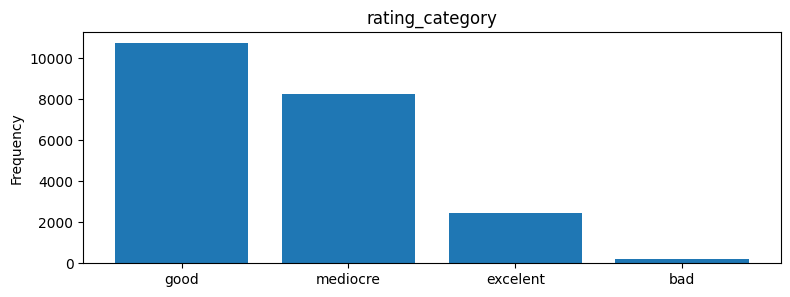

rating_category: 
 rating_category
good        10721
mediocre     8231
excelent     2472
bad           208
Name: count, dtype: int64


In [258]:
# Plot categorial_features with less than 10 distinct values
for cf in categorical_features:
  if games_df[cf].nunique() < 10:
    bar_plot(cf)

In [259]:
# print values for categorial_features with more than 9 distinct values
for cf in categorical_features:
  if games_df[cf].nunique() >= 10:
    print("{} \n".format(games_df[cf].value_counts()))

primary
Robin Hood                       6
Warhammer 40,000: Kill Team      4
Cosmic Encounter                 4
Chaos                            4
Gettysburg                       4
                                ..
Mysterium                        1
Viticulture Essential Edition    1
Five Tribes                      1
Magic: The Gathering             1
Pandemic Legacy: Season 1        1
Name: count, Length: 21237, dtype: int64 

boardgamecategory
['Card Game']                                                                                        992
['Wargame', 'World War II']                                                                          803
['Abstract Strategy']                                                                                655
['Dice']                                                                                             242
['Napoleonic', 'Wargame']                                                                            224
                     

### Univariate Variable Analysis - Numerical variables

In [260]:
# Visualize frequency and distribution of numerical features
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(games_df[variable], bins = 50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

In [261]:
# Get the numerical variables from games_df
numerical_features = [feature for feature in games_df.columns if games_df[feature].dtype not in [object, 'category']]
print(numerical_features)

['yearpublished', 'minplayers', 'maxplayers', 'minplaytime', 'minage', 'usersrated', 'average']


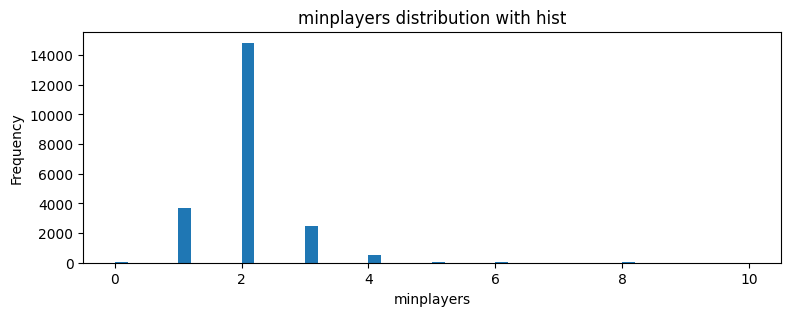

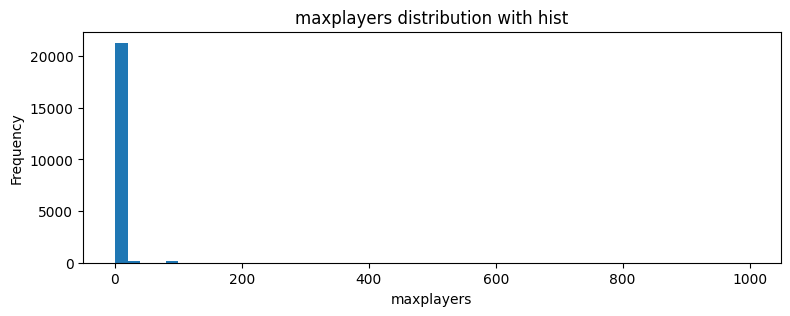

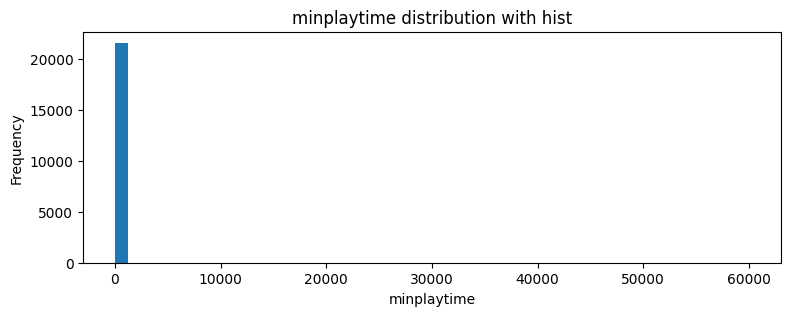

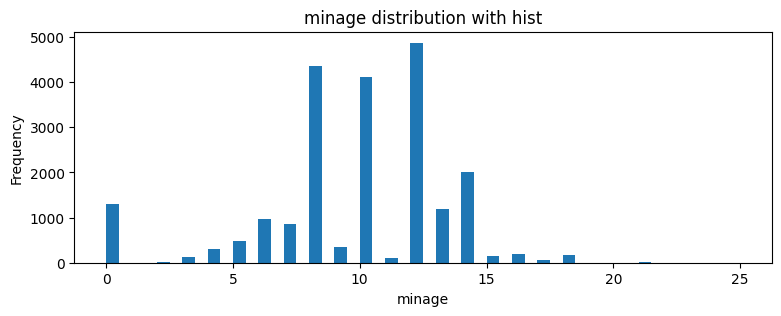

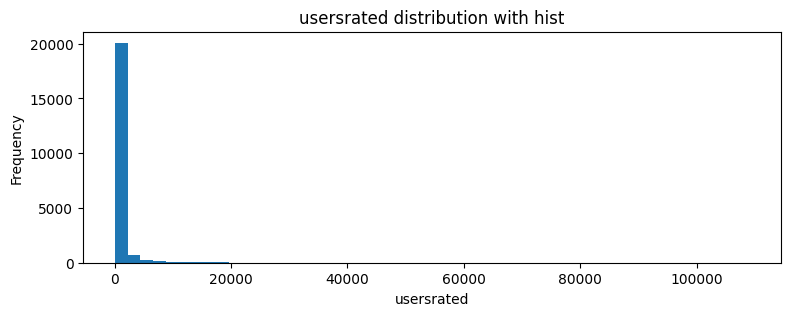

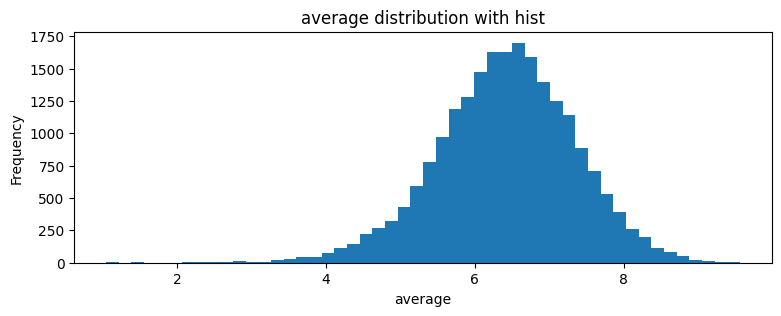

In [262]:
removed_nf = ["yearpublished"]
for nf in numerical_features:
  if nf not in removed_nf:
    plot_hist(nf)

### Find missing values

In [263]:
# find age null values
print(f'Age has {games_df["minage"].isnull().sum() + (games_df["minage"] == 0).sum()} null values')

# Filtro para ver TODAS as linhas que você contou no total_missing
missing_rows = games_df[
    (games_df["minage"].isnull()) | 
    (games_df["minage"] == 0)
]

missing_rows.head()

Age has 1301 null values


,primary,yearpublished,minplayers,maxplayers,minplaytime,minage,boardgamecategory,boardgamemechanic,boardgamefamily,boardgamedesigner,boardgameartist,boardgamepublisher,usersrated,average,rating_category
1409,Washington's War,2010,2,2,90,0,"['Age of Reason', 'American Revolutionary War'...","['Area Majority / Influence', 'Campaign / Batt...","['Country: Great Britain', 'Country: USA', 'Ho...",['Mark Herman'],"['Charles Kibler', 'Harald Lieske', 'Rodger B....","['GMT Games', 'Spielworxx']",2446.0,7.63221,excelent
1431,Fire in the Lake,2014,1,4,180,0,"['Civil War', 'Modern Warfare', 'Political', '...","['Area Majority / Influence', 'Dice Rolling', ...","['Components: Multi-Use Cards', 'Country: Viet...","['Mark Herman', 'Volko Ruhnke']","['Rodger B. MacGowan', 'Chechu Nieto', 'Mark S...",['GMT Games'],2417.0,8.07313,excelent
1562,Pairs,2014,2,8,15,0,['Card Game'],['Push Your Luck'],"['Creatures: Zombies', 'Crowdfunding: Kickstar...","['James Ernest', 'Paul Peterson', 'Heinrich Gl...","['Brett Bean', 'Echo Chernik', 'Ferran Criado'...","['Cheapass Games', 'AMIGO', 'Breaking Games', ...",2164.0,6.34566,good
1775,Coin Age,2013,2,2,15,0,"['Abstract Strategy', 'Print & Play']","['Area Majority / Influence', 'Area Movement',...","['Crowdfunding: Kickstarter', 'Players: Two Pl...",['Adam P. McIver'],"['Karim Chakroun', 'Adam P. McIver']","['Tasty Minstrel Games', '(Web published)', 'K...",1856.0,6.04471,mediocre
2005,Eat Poop You Cat,0,3,99,20,0,"['Humor', 'Party Game']",['Paper-and-Pencil'],['Admin: Outside the Scope of BGG'],['(Uncredited)'],NaN,['(Public Domain)'],1625.0,7.45018,good


### Basic Data Analysis
Bivariate analysis
* Pclass - Survived
* Sex - Survived
* SibSp - Survived
* Parch - Survived

In [264]:
# Min Players vs Rating Category
print("\nMin Players vs Rating Category")
display(pd.crosstab(games_df['minplayers'], games_df['rating_category']))

# Quantidade de votos vs Rating Category
print("\nQty votes vs Rating Category")
display(pd.crosstab(games_df['usersrated'], games_df['rating_category']))

# Categoria do jogo vs Categoria de rating
print("\nBoard Game Category vs Rating Category")
display(pd.crosstab(games_df['boardgamecategory'], games_df['rating_category']))

# Publisher vs Categoria de rating
print("\nBoard Game Publisher vs Rating Category")
display(pd.crosstab(games_df['boardgamepublisher'], games_df['rating_category']))


Min Players vs Rating Category


rating_category,bad,mediocre,good,excelent
minplayers,,,,
0,2,8,25,9
1,12,671,2067,925
2,170,6150,7122,1393
3,14,1136,1210,102
4,8,228,236,31
5,2,23,25,9
6,0,8,15,1
7,0,4,6,1
8,0,3,13,0



Qty votes vs Rating Category


rating_category,bad,mediocre,good,excelent
usersrated,,,,
29.0,0,5,0,0
30.0,8,154,98,20
31.0,6,148,125,39
32.0,5,139,109,26
33.0,7,133,108,35
...,...,...,...,...
81582.0,0,0,0,1
90021.0,0,0,0,1
108064.0,0,0,1,0



Board Game Category vs Rating Category


rating_category,bad,mediocre,good,excelent
boardgamecategory,,,,
"[""Children's Game"", 'City Building', 'Deduction']",0,0,1,0
"[""Children's Game"", 'City Building', 'Educational']",0,1,0,0
"[""Children's Game"", 'Civilization', 'Educational']",0,1,0,0
"[""Children's Game"", 'Collectible Components', 'Dice', 'Fantasy', 'Fighting', 'Miniatures', 'Movies / TV / Radio theme']",0,0,1,0
"[""Children's Game"", 'Collectible Components', 'Dice']",0,1,0,0
...,...,...,...,...
"['Wargame', 'Zombies']",0,0,1,0
['Wargame'],0,15,17,6
['Word Game'],1,48,25,1



Board Game Publisher vs Rating Category


rating_category,bad,mediocre,good,excelent
boardgamepublisher,,,,
"[""A Couple 'A Cowboys"", 'Educa Borras', 'Vivid Games']",0,1,0,0
"[""A.P.S. Che l'Inse - Demoelà project"", 'Demoela Giochi', 'Post Scriptum']",0,1,0,0
"[""A.P.S. Che l'Inse - Demoelà project"", 'Ghenos Games', 'Post Scriptum']",0,0,1,0
"[""Adam's Apple Games, LLC"", '(Web published)']",0,0,1,0
"[""Adam's Apple Games, LLC"", 'Boardgame Mall', 'Sovranti']",0,0,1,0
...,...,...,...,...
"['桜遊庵 (Ouyuuan)', 'Superlude Éditions', 'hobbity.eu', 'Japon Brand', 'Origames', 'SD Games']",0,0,1,0
['桜遊庵 (Ouyuuan)'],0,0,1,0
"['梟老堂 (Fukuroudou)', 'Frosted Games']",0,0,1,0


### Visualization

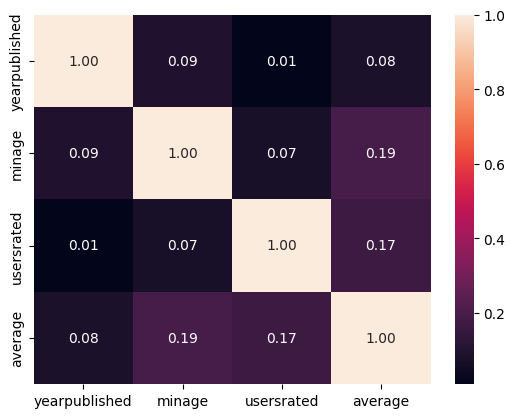

In [265]:
# Correlation Between Sibsp -- Parch -- Age -- Fare -- Survived
list1 = ["yearpublished" , "minage", "usersrated", "average"]
sns.heatmap(games_df[list1].corr(), annot = True, fmt = ".2f")
plt.show()

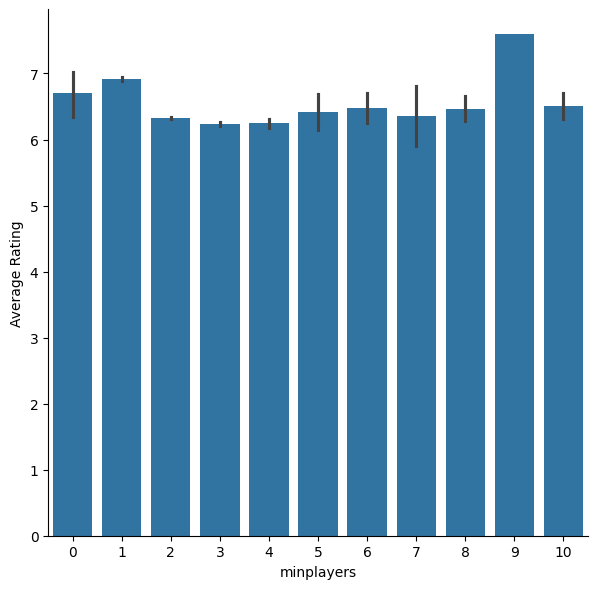

In [266]:
# MinPlayers → Rating Category
g = sns.catplot(x="minplayers", y="average", data=games_df, kind="bar", height=6)
g.set_ylabels("Average Rating")
plt.show()

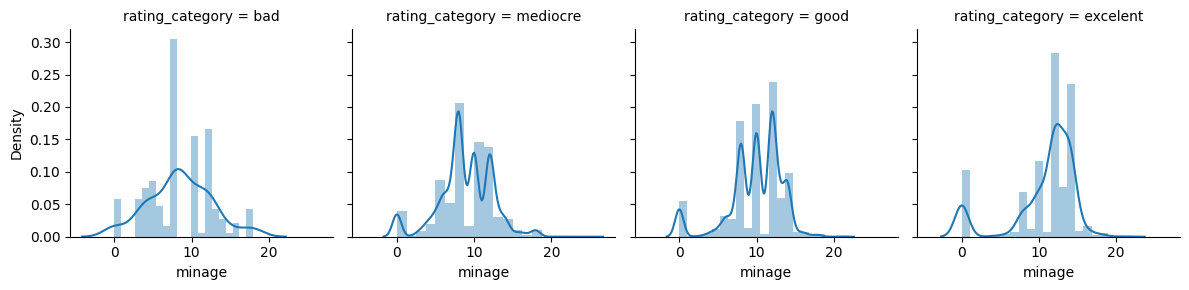

In [267]:
# MinAge → Distribuição de Ratings
g = sns.FacetGrid(games_df, col="rating_category")
g.map(sns.distplot, "minage", bins=20)
plt.show()


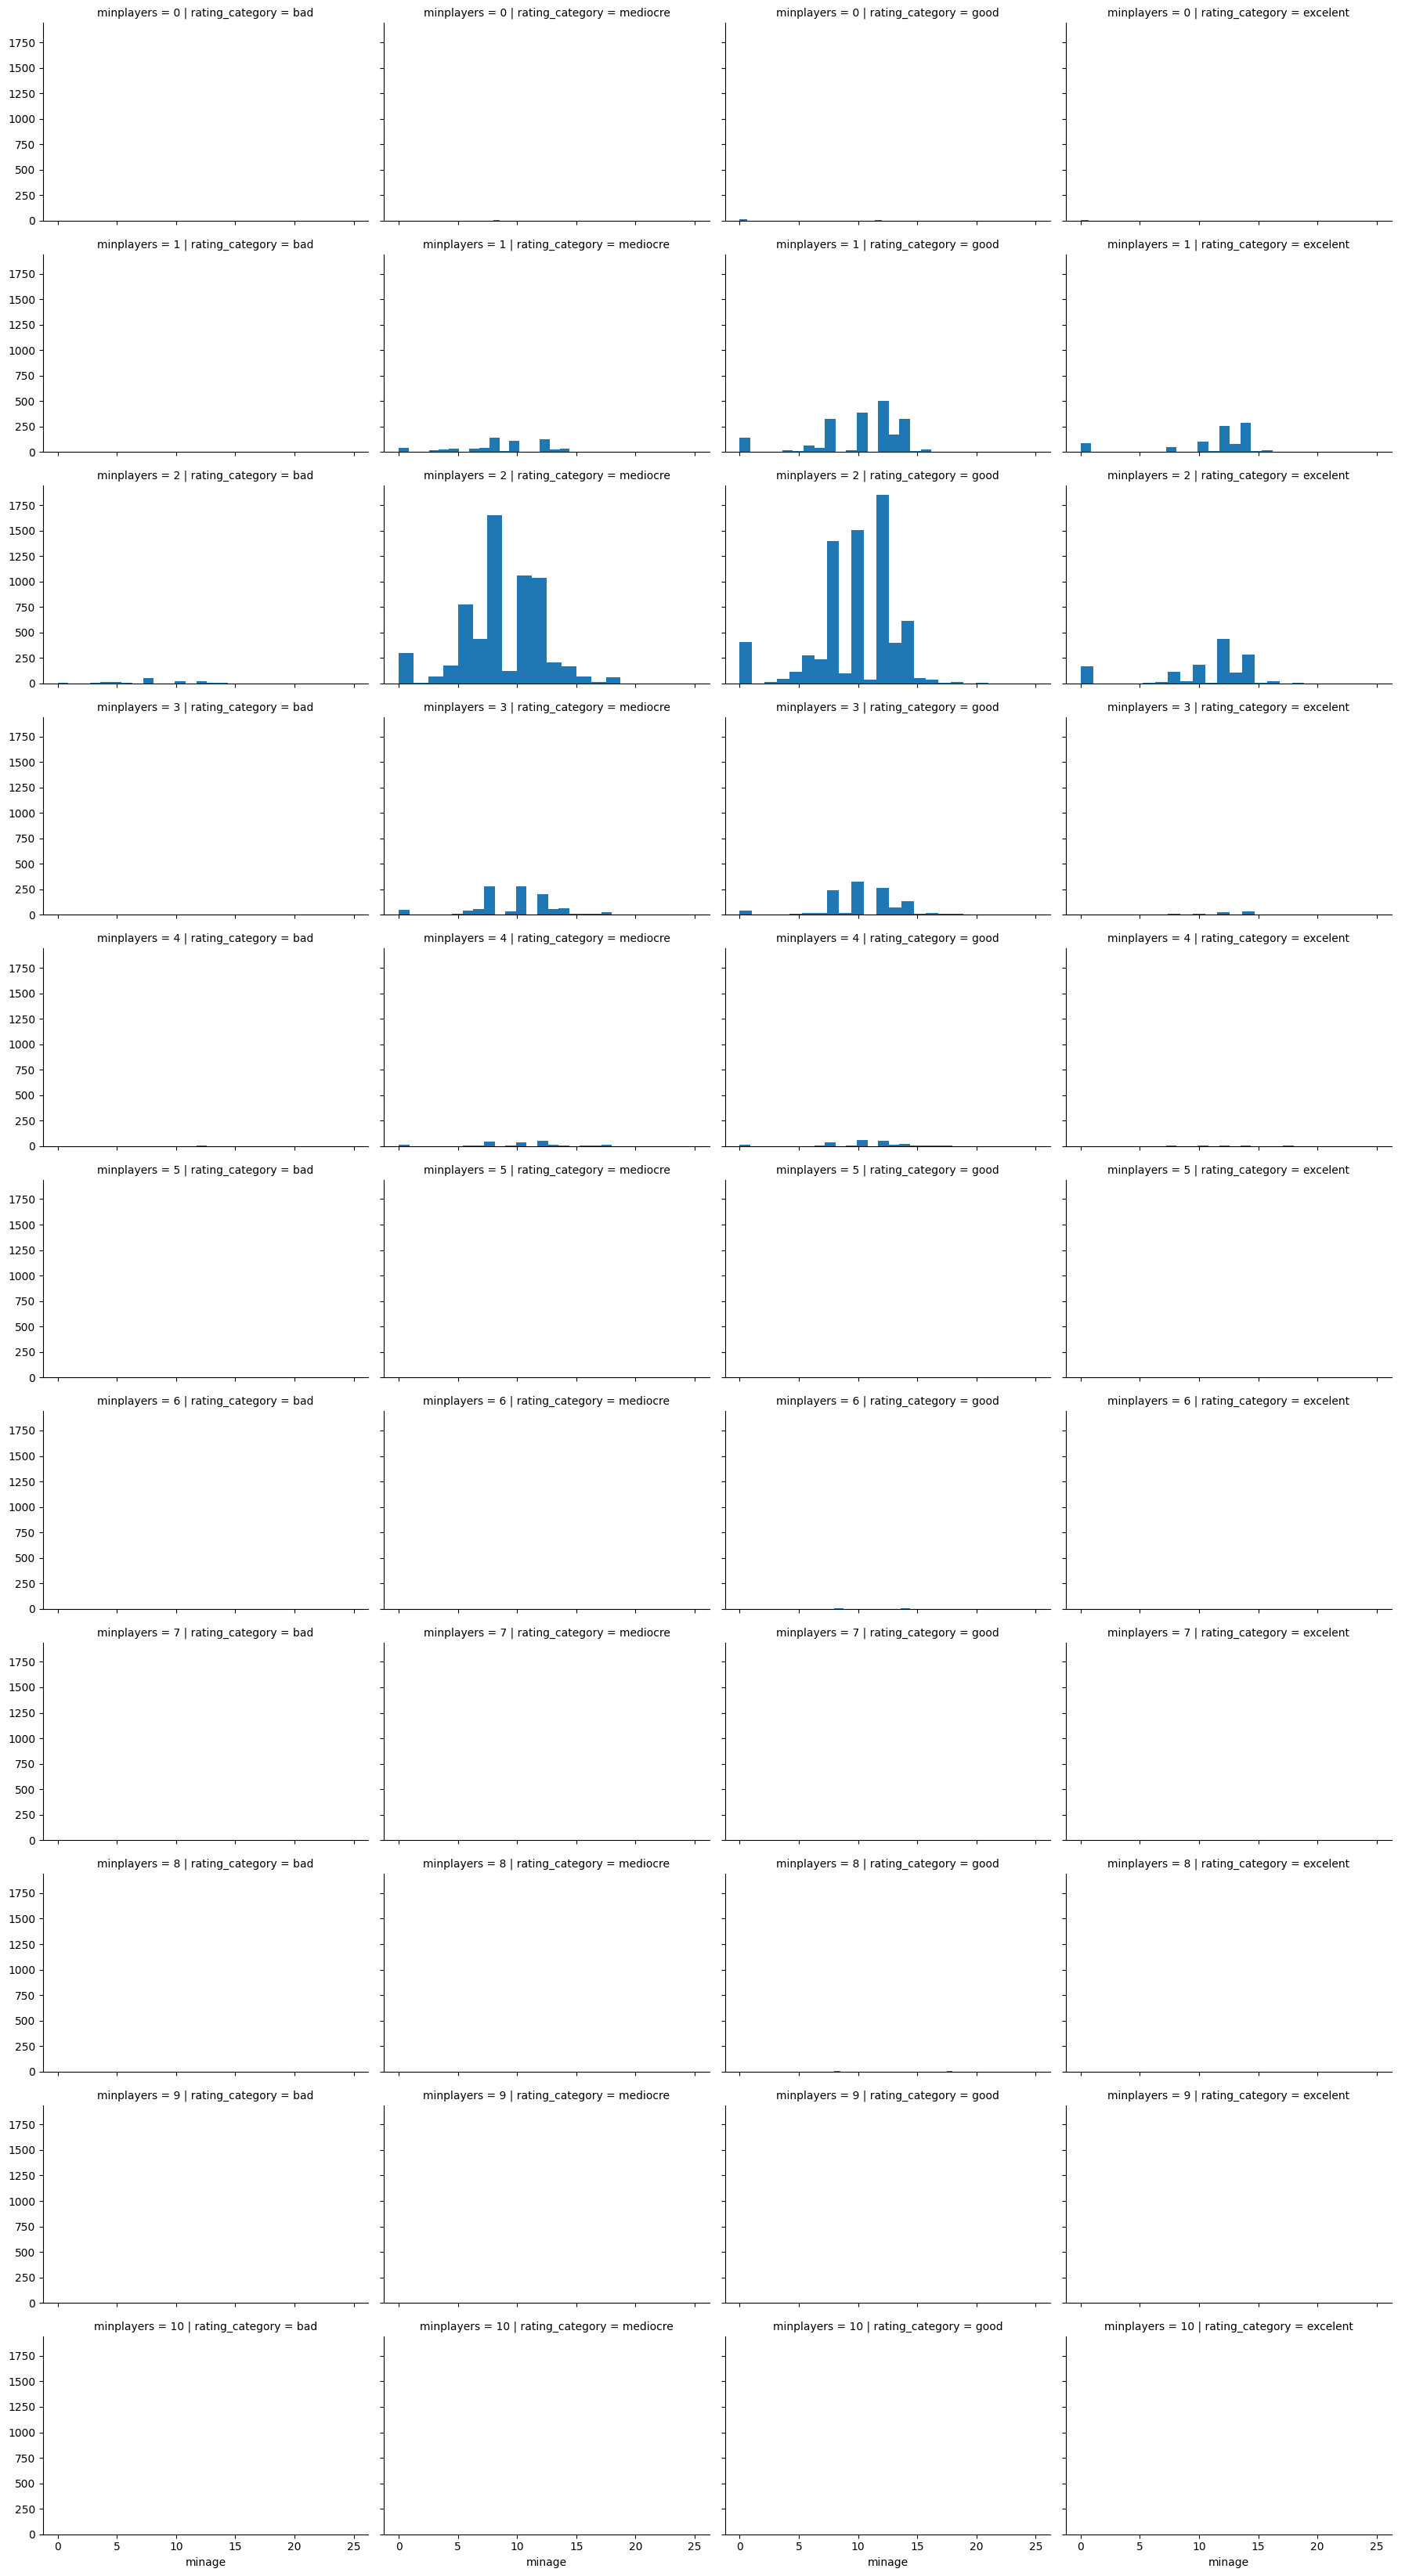

In [268]:
# Players (minplayers) × MinAge × Rating Category
g = sns.FacetGrid(games_df, col="rating_category", row="minplayers", aspect=1.5)
g.map(plt.hist, "minage", bins=20)
g.add_legend()
plt.show()

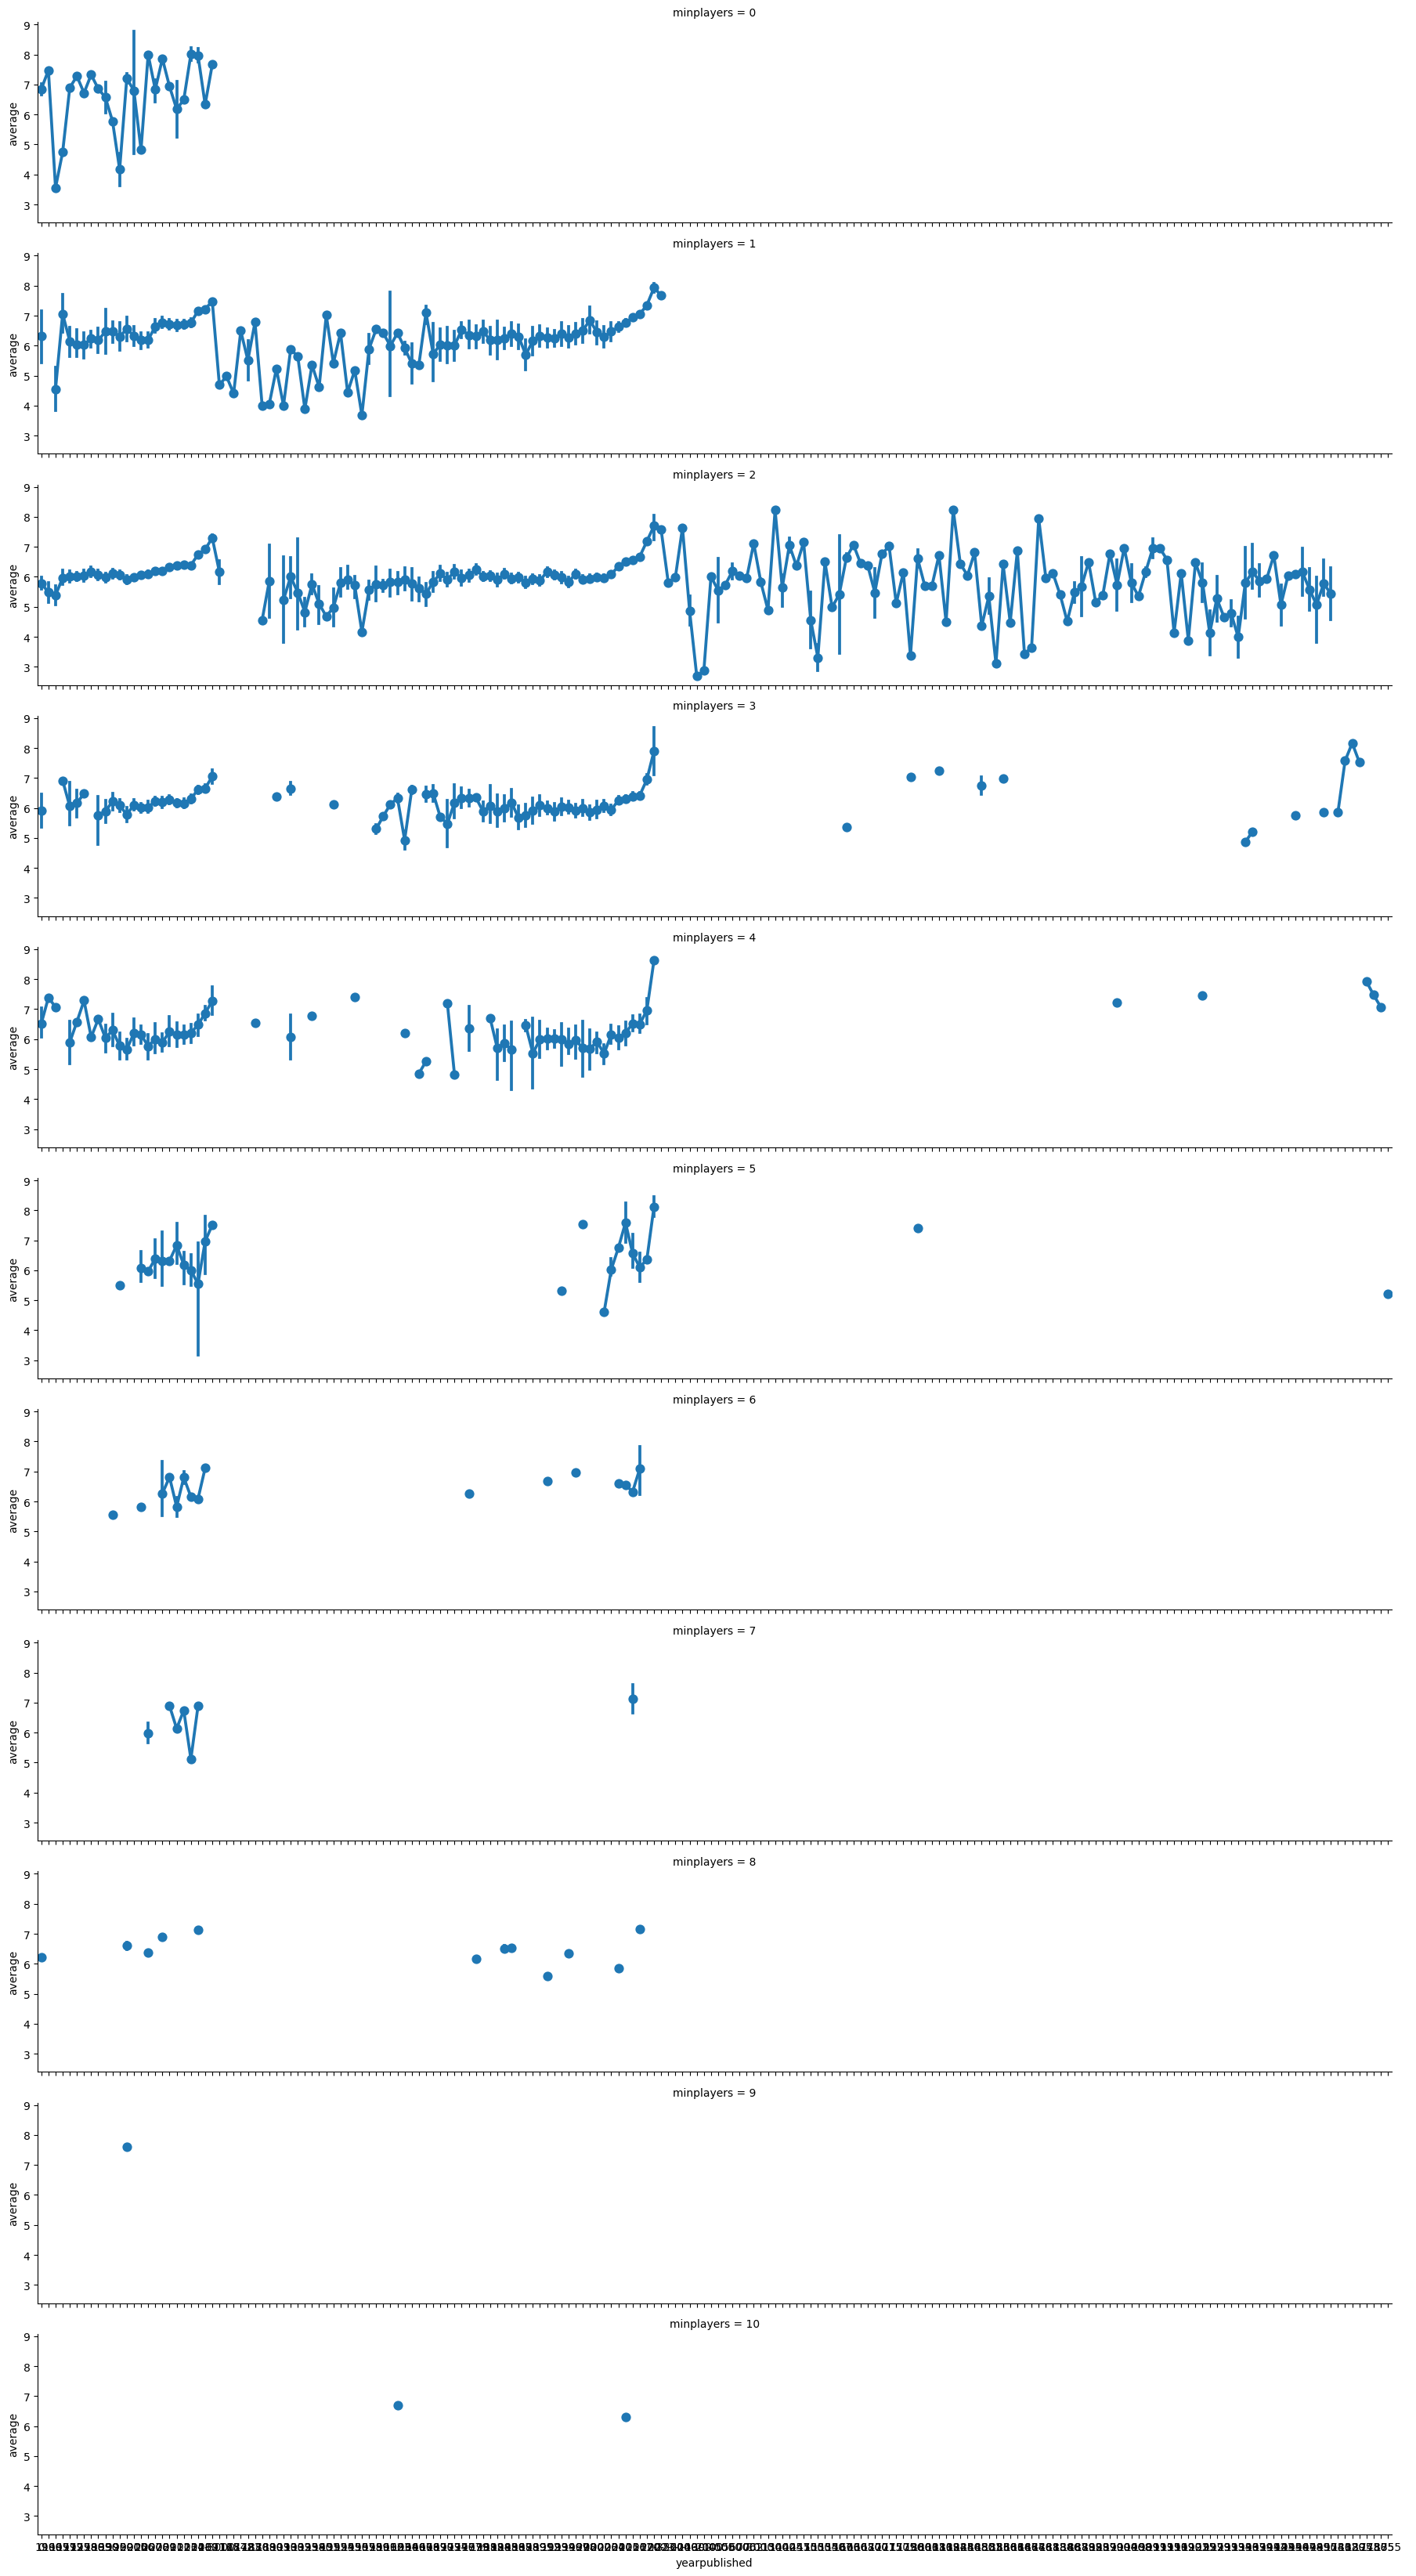

In [269]:
# Year Published × Average Rating × Players
g = sns.FacetGrid(games_df, row="minplayers", aspect=6)
g.map(sns.pointplot, "yearpublished", "average")
g.add_legend()
plt.show()

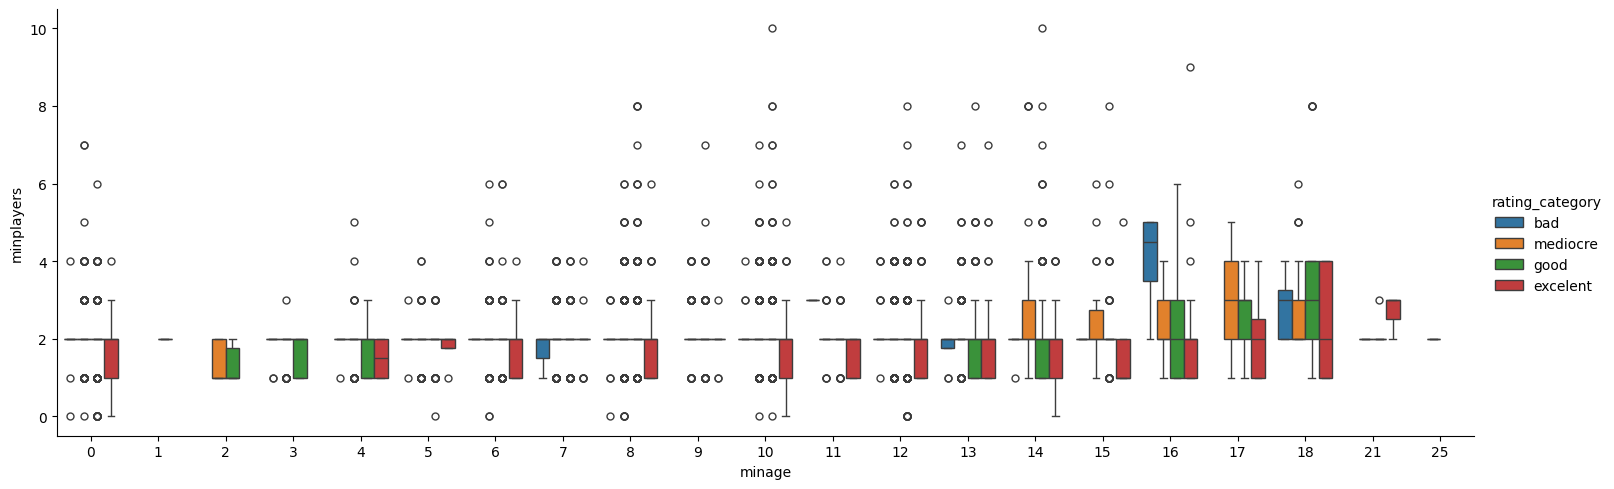

In [270]:
# MinAge vs MinPlayers
sns.catplot(x="minage",
            y="minplayers",
            hue="rating_category",
            data=games_df,
            kind="box",
            aspect=3
            )
plt.show()


---
# Data preparation

### Find and fill Missing Values

In [271]:
# get variables with null values
games_df.columns[games_df.isnull().any()]

Index(['boardgamecategory', 'boardgamemechanic', 'boardgamefamily',
       'boardgamedesigner', 'boardgameartist', 'boardgamepublisher',
       'usersrated'],
      dtype='object')

In [272]:
# list number of null values per variable
games_df.isnull().sum()

primary                  0
yearpublished            0
minplayers               0
maxplayers               0
minplaytime              0
minage                   0
boardgamecategory      283
boardgamemechanic     1590
boardgamefamily       3761
boardgamedesigner      596
boardgameartist       5907
boardgamepublisher       1
usersrated               1
average                  0
rating_category          0
dtype: int64

In [273]:
games_df[games_df["boardgamemechanic"].isnull()]

,primary,yearpublished,minplayers,maxplayers,minplaytime,minage,boardgamecategory,boardgamemechanic,boardgamefamily,boardgamedesigner,boardgameartist,boardgamepublisher,usersrated,average,rating_category
503,Timeline: Inventions,2010,2,8,15,8,"['Card Game', 'Educational', 'Trivia']",NaN,['Game: Timeline'],['Frédéric Henry'],"['Jérémie Fleury', 'Gaël Lannurien']","['Asmodee', 'Hazgaard Editions', 'ADC Blackfir...",7574.0,6.70678,good
811,Timeline: Events,2011,2,8,15,8,"['Card Game', 'Educational', 'Party Game', 'Tr...",NaN,['Game: Timeline'],['Frédéric Henry'],"['Xavier Collette', 'Jérémie Fleury', 'Nicolas...","['Asmodee', 'ADC Blackfire Entertainment', 'As...",4423.0,6.77473,good
905,Timeline: General Interest,2012,2,8,15,8,"['Card Game', 'Educational', 'Party Game', 'Tr...",NaN,['Game: Timeline'],['Frédéric Henry'],"['Xavier Collette', 'Nicolas Fructus']","['Asmodee', 'Asterion Press', 'Esdevium', 'Gal...",3941.0,6.77997,good
974,Timeline: Discoveries,2011,2,8,15,8,"['Card Game', 'Educational', 'Trivia']",NaN,"['Game: Timeline', 'Theme: Science']",['Frédéric Henry'],"['Xavier Collette', 'Nicolas Fructus']","['Asmodee', 'Asterion Press', 'Gém Klub Kft.',...",3636.0,6.72976,good
1094,Timeline: Music & Cinema,2013,2,8,15,8,"['Card Game', 'Educational', 'Music', 'Party G...",NaN,"['Game: Timeline', 'Music: Classical']",['Frédéric Henry'],NaN,"['Asmodee', 'Gém Klub Kft.', 'More Fun Co., Lt...",3214.0,6.73820,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21602,Mikado Magnetico,1988,2,4,0,6,['Action / Dexterity'],NaN,"['Category: Pick Them Up', 'Components: Magnets']",['(Uncredited)'],NaN,"['Alga', 'Damm / Egmont', 'Jumbo', 'Peter Pan ...",30.0,4.80000,mediocre
21616,Am Rande des Gletschers,2002,2,4,90,10,"['Card Game', 'Prehistoric']",NaN,NaN,"['Anja Menon', 'Patrick G. Menon']",NaN,['Krimsus Krimskrams-Kiste'],30.0,4.81667,mediocre
21618,Trip 1907: Interactive Escape the Book Game,2018,1,1,0,0,['Puzzle'],NaN,['Admin: Outside the Scope of BGG'],['Giorgos Kiafas'],"['J. Fadel', 'C. Morogianni']","['(Self-Published)', 'Albi', 'Fox Games', 'Gio...",30.0,6.06467,mediocre
21625,Events,1974,4,8,60,12,['Trivia'],NaN,['Series: 3M Bookshelf Series'],['(Uncredited)'],NaN,['3M'],29.0,4.81379,mediocre


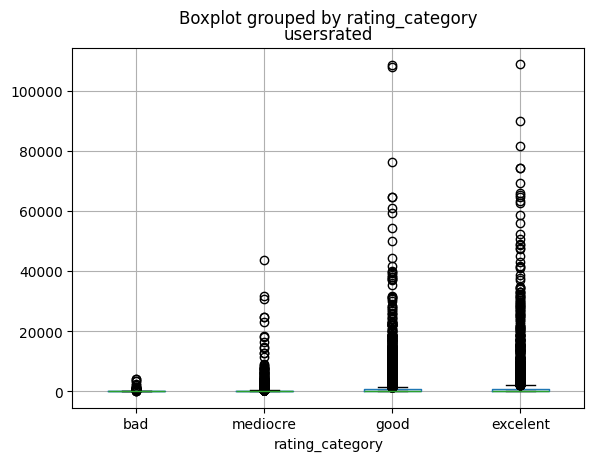

In [274]:
# check the fare distribution for ports
games_df.boxplot(column="usersrated",by = "rating_category")
plt.show()

In [275]:
games_df[games_df["boardgamemechanic"].isnull()]

,primary,yearpublished,minplayers,maxplayers,minplaytime,minage,boardgamecategory,boardgamemechanic,boardgamefamily,boardgamedesigner,boardgameartist,boardgamepublisher,usersrated,average,rating_category
503,Timeline: Inventions,2010,2,8,15,8,"['Card Game', 'Educational', 'Trivia']",NaN,['Game: Timeline'],['Frédéric Henry'],"['Jérémie Fleury', 'Gaël Lannurien']","['Asmodee', 'Hazgaard Editions', 'ADC Blackfir...",7574.0,6.70678,good
811,Timeline: Events,2011,2,8,15,8,"['Card Game', 'Educational', 'Party Game', 'Tr...",NaN,['Game: Timeline'],['Frédéric Henry'],"['Xavier Collette', 'Jérémie Fleury', 'Nicolas...","['Asmodee', 'ADC Blackfire Entertainment', 'As...",4423.0,6.77473,good
905,Timeline: General Interest,2012,2,8,15,8,"['Card Game', 'Educational', 'Party Game', 'Tr...",NaN,['Game: Timeline'],['Frédéric Henry'],"['Xavier Collette', 'Nicolas Fructus']","['Asmodee', 'Asterion Press', 'Esdevium', 'Gal...",3941.0,6.77997,good
974,Timeline: Discoveries,2011,2,8,15,8,"['Card Game', 'Educational', 'Trivia']",NaN,"['Game: Timeline', 'Theme: Science']",['Frédéric Henry'],"['Xavier Collette', 'Nicolas Fructus']","['Asmodee', 'Asterion Press', 'Gém Klub Kft.',...",3636.0,6.72976,good
1094,Timeline: Music & Cinema,2013,2,8,15,8,"['Card Game', 'Educational', 'Music', 'Party G...",NaN,"['Game: Timeline', 'Music: Classical']",['Frédéric Henry'],NaN,"['Asmodee', 'Gém Klub Kft.', 'More Fun Co., Lt...",3214.0,6.73820,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21602,Mikado Magnetico,1988,2,4,0,6,['Action / Dexterity'],NaN,"['Category: Pick Them Up', 'Components: Magnets']",['(Uncredited)'],NaN,"['Alga', 'Damm / Egmont', 'Jumbo', 'Peter Pan ...",30.0,4.80000,mediocre
21616,Am Rande des Gletschers,2002,2,4,90,10,"['Card Game', 'Prehistoric']",NaN,NaN,"['Anja Menon', 'Patrick G. Menon']",NaN,['Krimsus Krimskrams-Kiste'],30.0,4.81667,mediocre
21618,Trip 1907: Interactive Escape the Book Game,2018,1,1,0,0,['Puzzle'],NaN,['Admin: Outside the Scope of BGG'],['Giorgos Kiafas'],"['J. Fadel', 'C. Morogianni']","['(Self-Published)', 'Albi', 'Fox Games', 'Gio...",30.0,6.06467,mediocre
21625,Events,1974,4,8,60,12,['Trivia'],NaN,['Series: 3M Bookshelf Series'],['(Uncredited)'],NaN,['3M'],29.0,4.81379,mediocre


In [276]:
# Assign the port to null embarked values according to the data: fare value
games_df["boardgamemechanic"] = games_df["boardgamemechanic"].fillna("Unknown")
games_df[games_df["boardgamemechanic"].isnull()]

,primary,yearpublished,minplayers,maxplayers,minplaytime,minage,boardgamecategory,boardgamemechanic,boardgamefamily,boardgamedesigner,boardgameartist,boardgamepublisher,usersrated,average,rating_category


In [277]:
# Assign the fare overall average to the two null values in fare
publisher_means = games_df.groupby("boardgamepublisher")["usersrated"].mean()
usersrated_Unkown = games_df[games_df['usersrated'].isnull()].index
games_df["usersrated"] = games_df["usersrated"].fillna( games_df["boardgamepublisher"].map(publisher_means))

In [278]:
# Show the "games_df" row for usersrated 1044

for idx in usersrated_Unkown:
    row = games_df.loc[idx]
    print("Nome:", row["primary"], "| Publisher:", row["boardgamepublisher"],
          "| Usersrated preenchido:", row["usersrated"])

Nome: Teste | Publisher: ['Hans im Glück', '999 Games', 'Albi', 'Bard Centrum Gier', 'Bergsala Enigma (Enigma)', 'Brain Games', 'cutia.ro', 'Devir', 'Fantasmagoria', 'Filosofia Éditions', 'Giochi Uniti', 'Grow Jogos e Brinquedos', 'Hobby World', 'Ísöld ehf.', 'Kaissa Chess & Games', 'Korea Boardgames Co., Ltd.', 'Lautapelit.fi', 'Midgaard Games', 'MINDOK', 'Möbius Games', 'Monkey Time', 'NeoTroy Games', 'Nordic Games ehf', 'Paper Iyagi', 'Piatnik', 'Ponva d.o.o.', 'Rio Grande Games', 'Schmidt Spiele', 'Smart Ltd', 'Stupor Mundi', 'SuperHeated Neurons', 'Swan Panasia Co., Ltd.', 'Venice Connection', 'Ventura Games', 'Z-Man Games'] | Usersrated preenchido: 108776.0


### Feature Engineering
Usually, the name of the person is not relevant, but the title is:
* extract the title from name
* add title to features
* remove name from features
* Title is not a number -> one-hot encoding

In [279]:
# Typical names
games_df["boardgamepublisher"].head(10)


0    ['Z-Man Games', 'Albi', 'Asmodee', 'Asmodee It...
1    ['Hans im Glück', '999 Games', 'Albi', 'Bard C...
2    ['KOSMOS', '999 Games', 'Albi', 'Asmodee', 'As...
3    ['Repos Production', 'ADC Blackfire Entertainm...
4    ['Rio Grande Games', '999 Games', 'Albi', 'Bar...
5    ['Days of Wonder', 'ADC Blackfire Entertainmen...
6    ['Czech Games Edition', 'Asmodee', 'Bergsala E...
7    ['FryxGames', 'Arclight', 'Brädspel.se', 'Fant...
8    ['Repos Production', 'ADC Blackfire Entertainm...
9    ['Lookout Games', '999 Games', 'Brain Games', ...
Name: boardgamepublisher, dtype: object

In [280]:
# Extrair fraquia do nome do jogo
def extract_prefix(name):
    words = str(name).lower().split()
    
    if len(words) == 0:
        return ""
    
    # Primeira palavra
    w1 = words[0]
    
    # Se a primeira palavra tiver menos de 5 letras → usar 2 palavras (se existir) (The X e The Y podem ser franquias diferentes mas têm o mesmo prefixo)
    if len(w1) < 5 and len(words) > 1:
        return w1 + " " + words[1]
    
    # Caso contrário → usar só a primeira
    return w1

games_df["serie"] = games_df["primary"].apply(extract_prefix)

#Distingir franquias com o mesmo nome mas publisher diferente
games_df["franchise_name"] = (
    games_df["serie"].str.title() + 
    " (" + games_df["boardgamepublisher"].astype(str) + ")"
)

games_df["franchise_name"].head(10)

0    Pandemic (['Z-Man Games', 'Albi', 'Asmodee', '...
1    Carcassonne (['Hans im Glück', '999 Games', 'A...
2    Catan (['KOSMOS', '999 Games', 'Albi', 'Asmode...
3    7 Wonders (['Repos Production', 'ADC Blackfire...
4    Dominion (['Rio Grande Games', '999 Games', 'A...
5    Ticket (['Days of Wonder', 'ADC Blackfire Ente...
6    Codenames (['Czech Games Edition', 'Asmodee', ...
7    Terraforming (['FryxGames', 'Arclight', 'Bräds...
8    7 Wonders (['Repos Production', 'ADC Blackfire...
9    Agricola (['Lookout Games', '999 Games', 'Brai...
Name: franchise_name, dtype: object

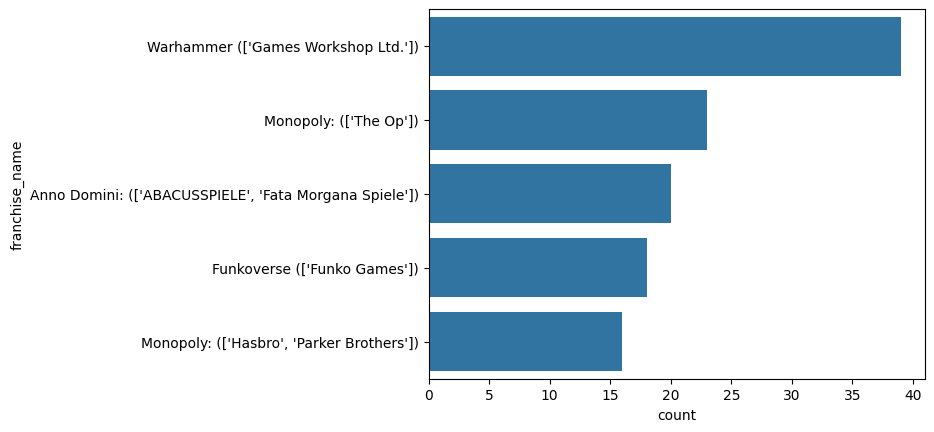

In [281]:
#Top 5 franquias com mais jogos

sns.countplot(
    y="franchise_name",
    data=games_df,
    order=games_df["franchise_name"].value_counts().head(5).index
)
plt.xticks(rotation=0)
plt.show()


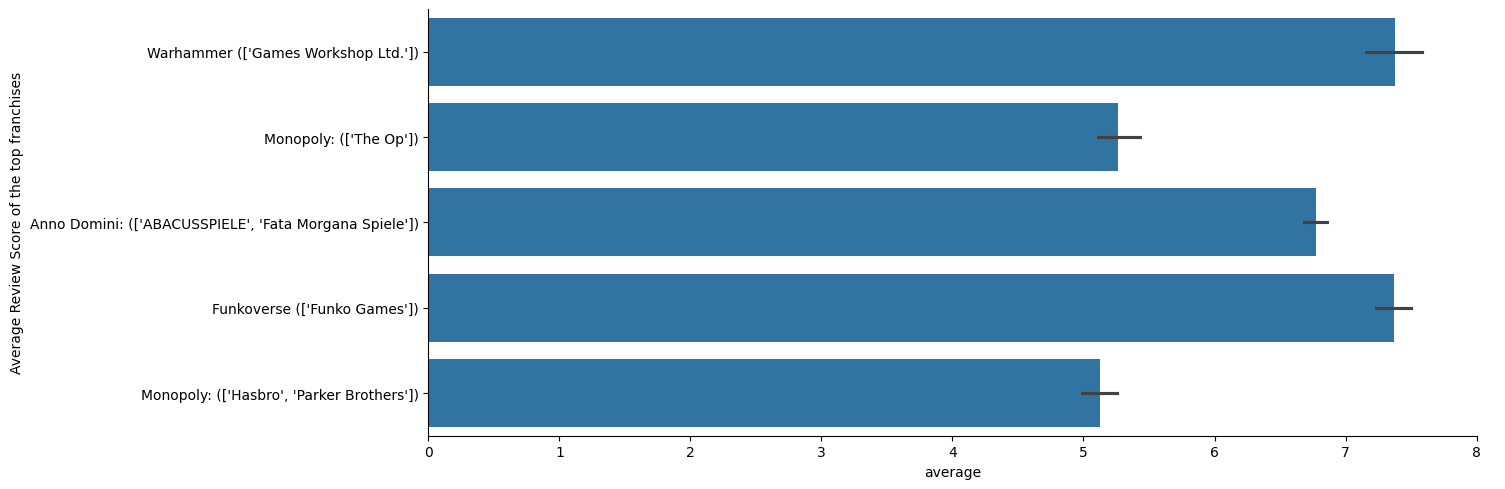

In [282]:
#Average Review Score das Top 5 Franquias com mais jogos

top_x = 5  # número de franquias que queremos mostrar

# Contar quantos jogos cada franquia tem
franchise_counts = games_df["franchise_name"].value_counts()

# Selecionar as top 5 franquias com mais jogos
top_franchises = franchise_counts.head(top_x).index

# Filtrar o DataFrame para essas franquias
df_top = games_df[games_df["franchise_name"].isin(top_franchises)]

# Criar gráfico de barra mostrando a média dos reviews por franquia
g = sns.catplot(
    y="franchise_name",
    x="average",
    data=df_top,
    kind="bar",
    order=top_franchises,
    aspect=3
)

# Rotacionar labels para vertical
g.set_xticklabels(rotation=0)

# Renomear eixo Y
g.set_ylabels("Average Review Score of the top franchises")

plt.show()

In [283]:
# One-hot encoding title
games_df = pd.get_dummies(games_df,columns=["rating_category"])
games_df.head()

,primary,yearpublished,minplayers,maxplayers,minplaytime,minage,boardgamecategory,boardgamemechanic,boardgamefamily,boardgamedesigner,boardgameartist,boardgamepublisher,usersrated,average,serie,franchise_name,rating_category_bad,rating_category_mediocre,rating_category_good,rating_category_excelent
0,Pandemic,2008,2,4,45,8,['Medical'],"['Action Points', 'Cooperative Game', 'Hand Ma...","['Components: Map (Global Scale)', 'Components...",['Matt Leacock'],"['Josh Cappel', 'Christian Hanisch', 'Régis Mo...","['Z-Man Games', 'Albi', 'Asmodee', 'Asmodee It...",109006.0,7.58896,pandemic,"Pandemic (['Z-Man Games', 'Albi', 'Asmodee', '...",False,False,False,True
1,Carcassonne,2000,2,5,30,7,"['City Building', 'Medieval', 'Territory Build...","['Area Majority / Influence', 'Map Addition', ...","['Cities: Carcassonne (France)', 'Components: ...",['Klaus-Jürgen Wrede'],"['Doris Matthäus', 'Anne Pätzke', 'Chris Quill...","['Hans im Glück', '999 Games', 'Albi', 'Bard C...",108776.0,7.41837,carcassonne,"Carcassonne (['Hans im Glück', '999 Games', 'A...",False,False,True,False
2,Catan,1995,3,4,60,10,"['Economic', 'Negotiation']","['Dice Rolling', 'Hexagon Grid', 'Income', 'Mo...","['Animals: Sheep', 'Components: Hexagonal Tile...",['Klaus Teuber'],"['Volkan Baga', 'Tanja Donner', 'Pete Fenlon',...","['KOSMOS', '999 Games', 'Albi', 'Asmodee', 'As...",108064.0,7.13598,catan,"Catan (['KOSMOS', '999 Games', 'Albi', 'Asmode...",False,False,True,False
3,7 Wonders,2010,2,7,30,10,"['Ancient', 'Card Game', 'City Building', 'Civ...","['Drafting', 'Hand Management', 'Set Collectio...","['Ancient: Babylon', 'Ancient: Egypt', 'Ancien...",['Antoine Bauza'],"['Dimitri Chappuis', 'Miguel Coimbra', 'Etienn...","['Repos Production', 'ADC Blackfire Entertainm...",90021.0,7.73515,7 wonders,"7 Wonders (['Repos Production', 'ADC Blackfire...",False,False,False,True
4,Dominion,2008,2,4,30,13,"['Card Game', 'Medieval']","['Deck, Bag, and Pool Building', 'Delayed Purc...","['Crowdfunding: Wspieram', 'Game: Dominion', '...",['Donald X. Vaccarino'],"['Matthias Catrein', 'Julien Delval', 'Tomasz ...","['Rio Grande Games', '999 Games', 'Albi', 'Bar...",81582.0,7.61000,dominion,"Dominion (['Rio Grande Games', '999 Games', 'A...",False,False,False,True


### Outlier Detection using Interquartile Range (IQR)

In [284]:
# function for finding outliers
def detect_outliers(df,features):
    outlier_indices = []

    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)

    # Define as multiplie outlier those indices that are outlier in more than two features
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)

    return multiple_outliers

In [285]:
# find outliers
games_df.loc[detect_outliers(games_df, ["yearpublished", "minplayers", "maxplayers", "minplaytime", "minage" ,"usersrated", "average"])]

,primary,yearpublished,minplayers,maxplayers,minplaytime,minage,boardgamecategory,boardgamemechanic,boardgamefamily,boardgamedesigner,boardgameartist,boardgamepublisher,usersrated,average,serie,franchise_name,rating_category_bad,rating_category_mediocre,rating_category_good,rating_category_excelent
112,UNO,1971,2,10,30,6,"['Number', 'Card Game', 'Comic Book / Strip', ...","['Hand Management', 'Lose a Turn', 'Matching',...","['Card Games: Matching', 'Card Games: Shedding...",['Merle Robbins'],"['(Uncredited)', 'Shepard Fairey', 'Keith Hari...","['(Unknown)', 'AMIGO', 'AS Manufacturas', 'ASS...",23150.0,5.41271,uno,"Uno (['(Unknown)', 'AMIGO', 'AS Manufacturas',...",False,True,False,False
286,Yahtzee,1956,2,10,30,6,"[""Children's Game"", 'Comic Book / Strip', 'Dic...","['Dice Rolling', 'Paper-and-Pencil', 'Push You...","['Game: Yahtzee', 'Mechanism: Roll-and-Write',...",['Edwin S. Lowe'],"['(Uncredited)', 'Michael Graves', 'Taavi Oolb...","['(Public Domain)', '(Unknown)', 'Adam Opel AG...",12730.0,5.40922,yahtzee,"Yahtzee (['(Public Domain)', '(Unknown)', 'Ada...",False,True,False,False
294,Diplomacy,1959,2,7,360,12,"['Bluffing', 'Negotiation', 'Political', 'Post...","['Area Majority / Influence', 'Area Movement',...","['Components: Miniatures', 'Continents: Europe...",['Allan B. Calhamer'],"['Blake Beasley', 'Hugh Bredin', 'Vincent Dutr...","['The Avalon Hill Game Co', 'Games Research, I...",12447.0,7.04075,diplomacy,"Diplomacy (['The Avalon Hill Game Co', 'Games ...",False,False,True,False
367,Poker,1810,2,10,60,12,"['Bluffing', 'Card Game']","['Betting and Bluffing', 'Player Elimination',...","['Components: Traditional Playing Cards', 'Pro...",['(Uncredited)'],"['(Uncredited)', 'René Goscinny', 'Albert Uder...","['(Public Domain)', '(Self-Published)', '(Unkn...",9745.0,6.72103,poker,"Poker (['(Public Domain)', '(Self-Published)',...",False,False,True,False
433,Pit,1903,3,8,30,7,"['Card Game', 'Economic', 'Negotiation', 'Part...","['Set Collection', 'Trading']","['Mechanism: Turnless Trading', 'TV Shows: The...","['Edgar Cayce', 'Harry Gavitt', 'George S. Par...","['Randy Asher', 'Paul Couture', 'Olivier Fagnè...","['(Self-Published)', 'Arclight', 'Clipper', 'C...",8592.0,6.38658,pit,"Pit (['(Self-Published)', 'Arclight', 'Clipper...",False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18759,Rapid Fire! (Second Edition): Fast Play World ...,2005,2,10,240,0,"['Book', 'Miniatures', 'Wargame', 'World War II']","['Dice Rolling', 'Line of Sight', 'Simulation']",['Game: Rapid Fire!'],"['Richard Marsh', 'Colin Rumford']",NaN,"['Rapid Fire Publications', 'Stratagem Publica...",41.0,7.23171,rapid,"Rapid (['Rapid Fire Publications', 'Stratagem ...",False,False,True,False
19692,Victory By Any Means: Campaign Guide,2004,2,99,300,0,"['Civilization', 'Exploration', 'Negotiation',...",Unknown,['Game: Victory by Any Means'],['Jay Waschak'],NaN,['VBAM Games'],37.0,7.54054,victory,Victory (['VBAM Games']),False,False,False,True
19730,Lords & Wizards,1977,2,12,180,0,"['Economic', 'Fantasy', 'Wargame']","['Alliances', 'Dice Rolling', 'Events', 'Grid ...","['Animals: Birds', 'Animals: Spiders', 'Creatu...",['Adam L. Gruen'],['Mike Gilbert (I)'],['Fantasy Games Unlimited'],36.0,5.79167,lords,Lords (['Fantasy Games Unlimited']),False,True,False,False
2999,Fighting Formations: Grossdeutschland Motorize...,2011,2,2,180,0,"['Wargame', 'World War II']","['Dice Rolling', 'Grid Movement', 'Hexagon Gri...",['Players: Two Player Only Games'],['Chad Jensen'],"['Lee Brimmicombe-Wood', 'Chad Jensen', 'Charl...",['GMT Games'],940.0,7.63897,fighting,Fighting (['GMT Games']),False,False,False,True


In [286]:
# drop outliers
# games_df = games_df.drop(detect_outliers(games_df,["Age","SibSp","Parch","Fare"]),axis = 0).reset_index(drop = True)

### Outlier Detection using DBScan algorithm

In [287]:
# Select numerical features and handle missing values, then scale the data using `StandardScaler`.
selected_features = ["yearpublished", "minplayers", "maxplayers", "minplaytime", "minage" ,"usersrated", "average"]
df_dbscan = games_df[selected_features].copy()

# Impute missing 'Age' values with the median
median_age = df_dbscan['average'].median()
df_dbscan['average'].fillna(median_age, inplace=True)

# Instantiate and apply StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_dbscan)
print("DataFrame for DBSCAN created, 'average' missing values imputed, and features scaled.")
print("Shape of scaled_features:", scaled_features.shape)


DataFrame for DBSCAN created, 'average' missing values imputed, and features scaled.
Shape of scaled_features: (21632, 7)


In [288]:
# original parameters: eps=0.5, min_samples=5
dbscan = DBSCAN(eps=2, min_samples=3)
clusters = dbscan.fit_predict(scaled_features)

# Identify outliers (cluster label -1)
outliers_indices = df_dbscan[clusters == -1].index

# print the number of outliers found
print(f"Number of outliers detected by DBSCAN: {len(outliers_indices)}")

# print the 10 first outliers
if not outliers_indices.empty:
    display(games_df.loc[outliers_indices].head(10))
else:
    print("No outliers detected with current DBSCAN parameters.")

Number of outliers detected by DBSCAN: 43


,primary,yearpublished,minplayers,maxplayers,minplaytime,minage,boardgamecategory,boardgamemechanic,boardgamefamily,boardgamedesigner,boardgameartist,boardgamepublisher,usersrated,average,serie,franchise_name,rating_category_bad,rating_category_mediocre,rating_category_good,rating_category_excelent
3,7 Wonders,2010,2,7,30,10,"['Ancient', 'Card Game', 'City Building', 'Civ...","['Drafting', 'Hand Management', 'Set Collectio...","['Ancient: Babylon', 'Ancient: Egypt', 'Ancien...",['Antoine Bauza'],"['Dimitri Chappuis', 'Miguel Coimbra', 'Etienn...","['Repos Production', 'ADC Blackfire Entertainm...",90021.0,7.73515,7 wonders,"7 Wonders (['Repos Production', 'ADC Blackfire...",False,False,False,True
45,The Resistance,2009,5,10,30,13,"['Bluffing', 'Card Game', 'Deduction', 'Negoti...","['Hidden Roles', 'Memory', 'Roles with Asymmet...","['Game: Werewolf / Mafia', 'Series: Postcard B...",['Don Eskridge'],"['Luis Francisco', 'Luis Franco', 'Piotr Haras...","['Indie Boards & Cards', '(Web published)', '9...",37370.0,7.26526,the resistance,"The Resistance (['Indie Boards & Cards', '(Web...",False,False,True,False
67,Chess,1475,2,2,0,6,['Abstract Strategy'],"['Grid Movement', 'Pattern Movement', 'Square ...","['Category: Combinatorial', 'Traditional Games...",['(Uncredited)'],"['(Uncredited)', 'Paolo Chiari', 'Honoré Daumi...","['(Public Domain)', '(Unknown)', '3M', 'ABRA',...",30820.0,7.15428,chess,"Chess (['(Public Domain)', '(Unknown)', '3M', ...",False,False,True,False
77,The Resistance: Avalon,2012,5,10,30,13,"['Bluffing', 'Card Game', 'Deduction', 'Fantas...","['Finale Ending', 'Hidden Roles', 'Roles with ...","['Crowdfunding: Kickstarter', 'Game: Werewolf ...",['Don Eskridge'],"['Luis Francisco', 'George Patsouras', 'Nan Su...","['Indie Boards & Cards', 'Broadway Toys LTD', ...",28818.0,7.56401,the resistance:,"The Resistance: (['Indie Boards & Cards', 'Bro...",False,False,False,True
104,Cards Against Humanity,2009,4,30,30,17,"['Card Game', 'Humor', 'Mature / Adult', 'Part...","['Hand Management', 'Player Judge', 'Simultane...","['Game: Cards Against Humanity (Official)', 'C...","['Josh Dillon', 'Daniel Dranove', 'Eli Halpern...",NaN,"['Cards Against Humanity LLC', 'Estrela']",24643.0,5.86165,cards,"Cards (['Cards Against Humanity LLC', 'Estrel...",False,True,False,False
130,Welcome To...,2018,1,100,25,10,['City Building'],"['Bingo', 'Contracts', 'Paper-and-Pencil', 'Pa...","[""Decades: The 1950's"", 'Digital Implementatio...",['Benoit Turpin'],['Anne Heidsieck'],"['Blue Cocker Games', 'Broadway Toys LTD', 'De...",21550.0,7.59704,welcome,"Welcome (['Blue Cocker Games', 'Broadway Toys ...",False,False,False,True
187,Zombie Dice,2010,2,99,10,10,"['Dice', 'Horror', 'Humor', 'Party Game', 'Zom...","['Dice Rolling', 'Die Icon Resolution', 'Push ...","['Containers: Tubes', 'Creatures: Zombies', 'G...",['Steve Jackson (I)'],['Alex Fernandez (I)'],"['Steve Jackson Games', 'Black Monk', 'Edge En...",16811.0,6.21670,zombie,"Zombie (['Steve Jackson Games', 'Black Monk', ...",False,False,True,False
191,Cartographers,2019,1,100,30,10,"['Fantasy', 'Territory Building']","['Bingo', 'Grid Coverage', 'Line Drawing', 'Pa...",['Components: Map (Continental / National scal...,['Jordy Adan'],['Lucas Ribeiro'],"['Thunderworks Games', 'Buró', 'Gen-X Games', ...",16729.0,7.71772,cartographers,"Cartographers (['Thunderworks Games', 'Buró', ...",False,False,False,True
208,Go,-2200,2,2,30,8,['Abstract Strategy'],"['Enclosure', 'Point to Point Movement', 'Squa...","['Category: Combinatorial', 'Components: Rocks...",['(Uncredited)'],"['(Uncredited)', 'Barbro Hennius', 'Norman Som...","['(Public Domain)', '(Self-Published)', '(Unkn...",15516.0,7.63588,go,"Go (['(Public Domain)', '(Self-Published)', '(...",False,False,False,True
296,Backgammon,-3000,2,2,30,8,"['Abstract Strategy', 'Dice']","['Advantage Token', 'Betting and Bluffing', 'D...","['Components: Wooden pieces & boards', 'Digita...",['(Uncredited)'],"['(Uncredited)', 'Willem Cornelisz Duyster', '..."